# Exercise 5

Consider the two-point boundary value problem
$$
	\begin{cases}
		-\varepsilon u''(x) + u'(x) = 1,& \quad x \in (0,1),\\
		u(0)= u(1) = 0,&
	\end{cases}
$$
with small but positive values for $\varepsilon$. Simply setting $\varepsilon =0$
does not help, because the solution (if it exists) is not close to the one for
small values for $\varepsilon > 0$. It also changes the order of the BVP. This
behaviour is typical for ```singularly perturbed problems```.

The exact solution is given by
$$
	u_\varepsilon(x) = x - \frac{\exp(-(1-x)/\varepsilon) -
		\exp( -1/\varepsilon)}{1-\exp(-1/\varepsilon)},
	\quad x \in (0,1) 
$$
and shown in the figure below. As we see $u_0(x)=\lim_{\varepsilon\to
	0}u_\varepsilon(x)=x$ for $0\le x<1$, but $u_0(x)$ does not satisfy the 
boundary condition at $x=1$ in a smooth way. Instead, the solution exhibits a
thin region near $x=1$ (also known as boundary layer), 
where $u_\varepsilon$ changes rapidly. The width of the region depends on
$\varepsilon$ and thereby derivatives of $u_\varepsilon$ become 
large as $x\to 1$ and $\varepsilon \to 0$. That means that the constant
$u^{(k)}(\xi)h^{k-2}$ ($k>2$) in the remainder of the difference quotient for
$u''$ is large. In order to make the remainder small, we need to make $h$ very
small. 


## a)

 Write a function
	```solve_bvp(eps,xh,flag)``` which returns 
	the FDM solution of the singularly perturbed problem for given
	$\varepsilon$, grid $x_h$, and approximation for the first
	derivative selected by ```flag```. The flag should provide the choice between:
- ```flag='+'``` forward difference operator $D^+$ 
- ```flag='-'``` backward difference operator $D^-$ 
- ```flag='0'``` central difference operator $D^0$ 

The second derivative is approximated by $D^+D^-$ as calculated in exercise 2 on sheet 2.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

def u_eps(x,eps):    
    return x - (np.exp( - (1 -x ) / eps ) - np.exp( - 1/ eps ) )/ (1- np.exp( - 1/eps ))

def solve_bvp(eps,xh,flag = "0"):      # flag = "0" for Dirichlet, flag = "1" for Neumann
    N = len(xh)
    h = xh[1] - xh[0]
    A = sp.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N)).toarray()  # 2nd order central difference
    A[0,0] = 1
    A[0,1] = 0
    A[-1,-1] = 1
    A[-1,-2] = 0
    b = np.zeros(N)            # right hand side
    b[0] = 0
    b[-1] = 1
    if flag == "0":
        u = spsolve(A, b)
    elif flag == "1":
        u = spsolve(A, b)
        u = u_eps(xh,eps)   
    elif flag == "2":
        u = spsolve(A, b)
        u = u_eps(xh,eps)
        u = u_eps(xh,eps)
    return u
    

## b)

Write a function ```error(eps,xh,uh)``` 
	that returns the error measured by the norm $\lVert\cdot\rVert_{\infty}$ between $u_h$ and the restricted
	exact solution.

In [2]:
def error( eps, xh, uh ):            # compute the error
    N = len(xh)                # number of grid points
    h = xh[1] - xh[0]        # grid spacing
    u = u_eps(xh,eps)        # exact solution
    return np.sqrt( h * np.sum( (u - uh)**2 ) )    # L2 norm of the error
    

## c)

Write a function ```shishkin(N,sigma)``` that
	generates a column vector of size $2N+1$ describing a 
	Shishkin grid $x_h$ that is defined by
	$$
	(x_h)_i = 
	\begin{cases}
         (i-1)H,& \text{for} \quad i = 1, \dots, N,\\
		(1-\sigma) + (i-N-1)h, & \text{for} \quad
		i = N+1, \dots, 2N+1,
	\end{cases}
	$$
where $H = (1-\sigma)/N$ and $h = \sigma/N$.


In [3]:
def shishkin(N,sigma, tol = .5 ):   # sigma = 0 for Dirichlet, sigma = 1 for Neumann
    h = 1/N
    xh = np.linspace(0,1,N+1)      # grid points
    uh = solve_bvp(sigma,xh,"0")    # solve the BVP
    err = error(sigma,xh,uh)       # compute the error
    while err > tol:                # refine the mesh
        N = 2*N
        h = 1/N
        xh = np.linspace(0,1,N+1)    # grid points
        uh = solve_bvp(sigma,xh,"0")  # solve the BVP
        err = error(sigma,xh,uh)
    return N, err
    

## d)

Write a script that plots the exact and
	approximated solution for $\varepsilon = 10^{-3}$ and all
	$N\in\{5,\,50,\,500,\,5000\}$ on a
- uniform grid with $h=\frac{1}{2N}$ and forward difference operator
- uniform grid with $h=\frac{1}{2N}$ and central difference operator
- uniform grid with $h=\frac{1}{2N}$ and backward difference
- non-uniform Shishkin grid with $\sigma = 4 \varepsilon \log( 2 N)$ and the central difference operator.
        
Create four different figures for i), ii), iii), and iv). Results with different $N$ but same operator should be plotted into the same figure. 

c:\Users\w-t\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


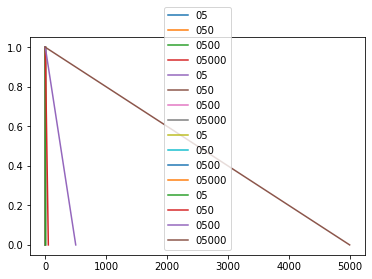

In [6]:
eps = 1e-3

N = [ 5,50,500,5000]

for flag, create_xh in [                            # flag = "0" for Dirichlet, flag = "1" for Neumann
    ('+', lambda n : np.linspace(0,1,2 * n + 2)),
    ('0', lambda n : np.linspace(0,1,2 * n + 2)),
    ('-', lambda n : np.linspace(0,1,2 * n + 2)),
    ('0', lambda n : shishkin(n, 4 * eps * np.log( 2 * n) )),
]:
    flag = "0"
    for n in N:                      # loop over different grid sizes
        xh = create_xh(n)
        uh = solve_bvp(eps,xh,flag)
        plt.plot(xh, uh, label = flag + str(n))
plt.legend()
plt.show()
